In [1]:
%matplotlib inline

In [2]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import Adadelta
from keras.utils import to_categorical

from generate_data import form_training_data, form_testing_data
from sound_dict import sound_string_to_num, sound_num_to_string

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [7]:
x_data, y_data, pad_length = form_training_data()
test_data, correct_outputs = form_testing_data(pad_length)
print('Input data shape', x_data.shape, '\nOutput list length', len(y_data), '\nPadding max length', pad_length)

Input data shape (24, 20, 38) 
Output list length 24 
Padding max length 38


In [8]:
x_data = x_data.reshape((x_data.shape[0], x_data.shape[1], x_data.shape[2], 1))
y_data = to_categorical(y_data)
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))
print('Input shape for CNN 2D',x_data.shape,'\nOutput shape for CNN 2D', y_data.shape)

Input shape for CNN 2D (24, 20, 38, 1) 
Output shape for CNN 2D (24, 3)


In [9]:
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(2,2), activation='softmax', data_format='channels_last', input_shape=(x_data.shape[1],x_data.shape[2],1)))
    model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))

    ada = Adadelta(lr=1e-1)

    model.compile(loss='categorical_crossentropy', optimizer=ada)

In [10]:
    history = model.fit(x_data,y_data,epochs=500, batch_size=1, verbose=0)

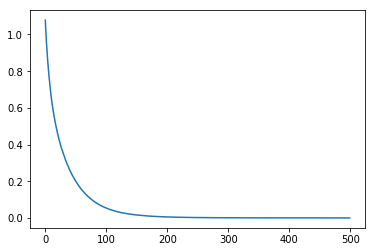

In [11]:
    plt.plot(history.history['loss'])
    plt.show()

In [12]:
output = model.predict(test_data)
for i in range(output.shape[0]):
    print('\nSnare guess: ', np.round(output[i, 0], 3), 'Hihat guess: ', np.round(output[i, 1], 3), 'Kick guess: ', np.round(output[i, 2],3))
    print(sound_num_to_string[correct_outputs[i]], ' is the correct answer')


Snare guess:  0.082 Hihat guess:  0.915 Kick guess:  0.003
hihat  is the correct answer

Snare guess:  0.596 Hihat guess:  0.398 Kick guess:  0.007
hihat  is the correct answer

Snare guess:  0.0 Hihat guess:  0.0 Kick guess:  1.0
kick  is the correct answer

Snare guess:  0.0 Hihat guess:  0.0 Kick guess:  1.0
kick  is the correct answer

Snare guess:  1.0 Hihat guess:  0.0 Kick guess:  0.0
snare  is the correct answer

Snare guess:  0.996 Hihat guess:  0.003 Kick guess:  0.001
snare  is the correct answer
